# Machine Learning

## Discretization
### `Discretization` is the process of converting continuous data or features into discrete bins or categories. In machine learning and data preprocessing, discretization is used to transform numerical variables into categorical variables by dividing the range of values into intervals (bins). This can help certain algorithms perform better, make data easier to interpret, or prepare data for specific types of analysis.

### `Example`:
### If you have a column of ages (continuous), you can discretize it into categories like "child", "teen", "adult", and "senior" based on age ranges.

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
# Importing Dataset
df = sns.load_dataset('titanic')
# Displaying the first few rows of the dataset
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Missing values in 'age' column: 177
Missing values in 'age' column after filling: 0
    age   age_binned
0  22.0  Young Adult
1  38.0        Adult
2  26.0  Young Adult
3  35.0        Adult
4  35.0        Adult


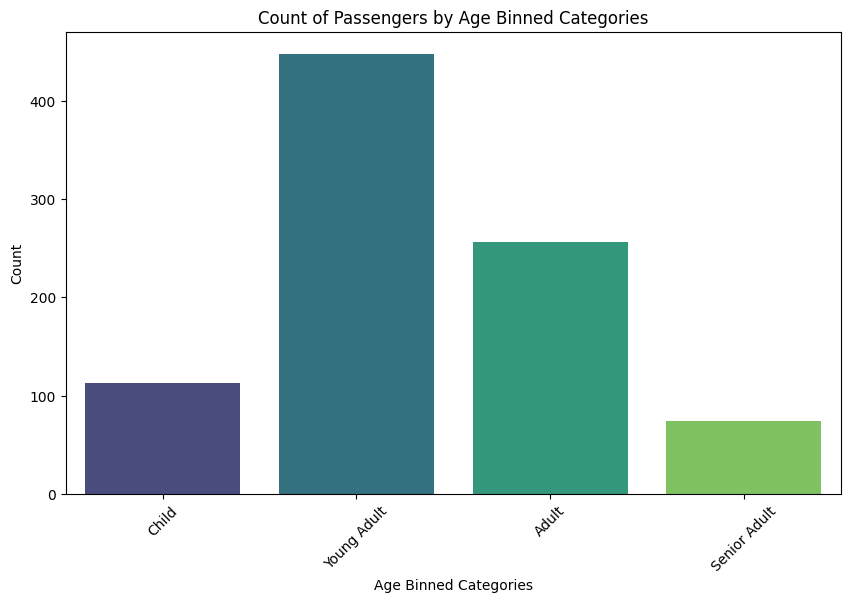

In [15]:
# First we check the missing values in the age column 
print("Missing values in 'age' column:", df["age"].isnull().sum())
# Filling missing values in the 'age' column with the mean age (avoid chained assignment warning)
df["age"] = df["age"].fillna(df["age"].mean())
# Again checking the missing values in the age column
print("Missing values in 'age' column after filling:", df["age"].isnull().sum())
# Good to go for Binning the age column
# Binning the 'age' column into 4 bins
bins = [0, 18, 30, 50, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior Adult']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# Displaying the first few rows of the dataset after binning
print(df[['age', 'age_binned']].head())
# Visualizing the binned age column (fix palette warning)
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=df, hue='age_binned', palette='viridis', legend=False)
plt.title('Count of Passengers by Age Binned Categories')
plt.xlabel('Age Binned Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Using KBinDiscritizer from SK-Learn for Binning.

In [30]:
# Initializing the KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
# Fitting and transforming the 'age' column
df['age_binned_kb'] = kbd.fit_transform(df[['age']])
# Displaying the first few rows of the dataset after KBinsDiscretizer
print(df[['age', 'age_binned_kb']].sample(5))    
print("Display bin ranges with their corresponding encoder value")
bin_edges = kbd.bin_edges_[0]
print("Range\t\tEncoder")
for i in range(len(bin_edges) - 1):
    print(f"[{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})\t{i}")


           age  age_binned_kb
420  29.699118            1.0
214  29.699118            1.0
439  31.000000            1.0
52   49.000000            2.0
544  50.000000            2.0
Display bin ranges with their corresponding encoder value
Range		Encoder
[0.42, 20.32)	0
[20.32, 40.21)	1
[40.21, 60.11)	2
[60.11, 80.00)	3
